Download the auto-mpg dataset and do the following:
1. Drop column Origin from the dataset.
2. Find out all the missing values in the dataset and replace it with its most
appropriate replacement.
Finding out missing values: We can use .sum() method after
applying .isnull() this will return sum of missing values within each columns in
the dataframe.
import pandas as pd
df = pd.read_csv('IMDB-Movie-Data.csv')
df.isnull().sum()
3. Find and remove duplicate entries for the column ‘ CAR Number’
4. Get the basic insights:
✔ Display the first five and last five rows
✔ Display all the column names in the dataset
✔ Display the concise summary of your dataset
✔ Display the name of the car with maximum number of horsepower.

In [24]:

import pandas as pd
import numpy as np
import micropip 
await micropip.install('openpyxl')
df=pd.read_excel("auto-mpg .xlsx")

In [25]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,CAR Number
0,18,8,307.0,130,3504,12.0,70.0,1,chevrolet chevelle malibu,L6V 043
1,15,8,350.0,165,3693,11.5,70.0,1,buick skylark 320,RTY079
2,18,8,318.0,150,3436,11.0,70.0,1,plymouth satellite,MTP600
3,16,8,304.0,150,3433,12.0,70.0,1,amc rebel sst,MNJ000
4,17,8,302.0,140,3449,10.5,70.0,1,ford torino,JEETMEET


In [26]:
df.drop("origin",axis=1,inplace=True)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,CAR Number
0,18,8,307.0,130,3504,12.0,70.0,chevrolet chevelle malibu,L6V 043
1,15,8,350.0,165,3693,11.5,70.0,buick skylark 320,RTY079
2,18,8,318.0,150,3436,11.0,70.0,plymouth satellite,MTP600
3,16,8,304.0,150,3433,12.0,70.0,amc rebel sst,MNJ000
4,17,8,302.0,140,3449,10.5,70.0,ford torino,JEETMEET


In [27]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    2
model year      2
car name        0
CAR Number      7
dtype: int64

In [28]:
import numpy as np
mean=df["acceleration"].mean()
df["acceleration"].replace(np.nan,mean,inplace=True)
df.isnull().sum()

<ipython-input-28-b0ee80961133>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["acceleration"].replace(np.nan,mean,inplace=True)


mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      2
car name        0
CAR Number      7
dtype: int64

In [ ]:
# Replace missing values with the most appropriate replacement
for column in df.columns:
    if df[column].isnull().sum() > 0:
        if df[column].dtype == 'object':
            # Fill categorical columns with the mode
            df[column].fillna(df[column].mode()[0], inplace=True)
        else:
            # Fill numerical columns with the median
            df[column].fillna(df[column].median(), inplace=True)

print("Missing Values after handling:\n", df.isnull().sum())

In [29]:
freq=df["model year"].value_counts().idxmax()
df["model year"].replace(np.nan,freq,inplace=True)
df.isnull().sum()

<ipython-input-29-d50ef567f011>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["model year"].replace(np.nan,freq,inplace=True)


mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
car name        0
CAR Number      7
dtype: int64

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           98 non-null     int64  
 1   cylinders     98 non-null     int64  
 2   displacement  98 non-null     float64
 3   horsepower    98 non-null     int64  
 4   weight        98 non-null     int64  
 5   acceleration  98 non-null     float64
 6   model year    98 non-null     float64
 7   car name      98 non-null     object 
 8   CAR Number    91 non-null     object 
dtypes: float64(3), int64(4), object(2)
memory usage: 6.2+ KB


In [31]:
df.dropna(subset=['CAR Number'],axis=0,inplace=True)
df.isnull().sum()



mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
car name        0
CAR Number      0
dtype: int64

In [32]:
df.drop_duplicates(subset=['CAR Number'],inplace=True)
df['CAR Number'].value_counts()

# Remove duplicate entries based on 'CAR Number'
if 'CAR Number' in df.columns:
    df.drop_duplicates(subset=['CAR Number'], keep='first', inplace=True)
    print("Duplicates removed based on 'CAR Number'")

CAR Number
L6V 043    1
ET4457     1
ABC346     1
SEE467     1
MAST36     1
          ..
HGVG69     1
JHGY59     1
JHJGH38    1
IUHU63G    1
HUYT76     1
Name: count, Length: 89, dtype: int64

In [33]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,CAR Number
0,18,8,307.0,130,3504,12.0,70.0,chevrolet chevelle malibu,L6V 043
1,15,8,350.0,165,3693,11.5,70.0,buick skylark 320,RTY079
2,18,8,318.0,150,3436,11.0,70.0,plymouth satellite,MTP600
3,16,8,304.0,150,3433,12.0,70.0,amc rebel sst,MNJ000
4,17,8,302.0,140,3449,10.5,70.0,ford torino,JEETMEET


In [34]:
df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,CAR Number
93,14,8,318.0,150,4237,14.5,73.0,plymouth fury gran sedan,FGTEE4
94,13,8,440.0,215,4735,11.0,73.0,chrysler new yorker brougham,GTTYR6
95,12,8,455.0,225,4951,11.0,73.0,buick electra 225 custom,TTGGT53
96,13,8,360.0,175,3821,11.0,73.0,amc ambassador brougham,TGTYY67
97,18,6,225.0,105,3121,16.5,73.0,plymouth valiant,HUYT76


In [35]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'car name', 'CAR Number'],
      dtype='object')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89 entries, 0 to 97
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           89 non-null     int64  
 1   cylinders     89 non-null     int64  
 2   displacement  89 non-null     float64
 3   horsepower    89 non-null     int64  
 4   weight        89 non-null     int64  
 5   acceleration  89 non-null     float64
 6   model year    89 non-null     float64
 7   car name      89 non-null     object 
 8   CAR Number    89 non-null     object 
dtypes: float64(3), int64(4), object(2)
memory usage: 6.3+ KB


In our dataset, the fuel consumption column is "mpg" and is represented by mpg
(miles per gallon) unit. Assume we are developing an application in a country
that accepts fuel consumption with the L/100km standard. change the name of
the column to "L/100km".
6. Normalize the column “Weight” so that the values range from 0 to 1
7. Normalization is the process of transforming values of several variables into a
similar range. Typical normalizations include scaling the variable so the variable
average is 0, scaling the variable so the variance is 1, or scaling variable so the
variable values range from 0 to 1
8. Approach: replace original value by (original value)/(maximum value)
9. In our dataset, "horsepower" is a real valued variable ranging from 48 to 288, it
has 57 unique values. What if we only care about the price difference between
cars with high horsepower, medium horsepower, and little horsepower (3
types)? Can we rearrange them into three ‘bins' to simplify analysis?
10. We will use the Pandas method 'cut' to segment the 'horsepower' column into 3
bins

In [37]:
# Find the car with the maximum horsepower (225) using loc
max_hp_car = df.loc[df['horsepower'] == 225, ['car name', 'horsepower']]
print("\nCar with maximum horsepower (225):\n", max_hp_car)

# alternative way
m=df['horsepower'].max()
max_hp_car = df[df['horsepower'] == m]
print("\nCar with maximum horsepower (225):\n", max_hp_car[['car name', 'horsepower']])



Car with maximum horsepower (225):
                     car name  horsepower
8           pontiac catalina         225
13   buick estate wagon (sw)         225
95  buick electra 225 custom         225


In [38]:
df["mpg"]=235/df["mpg"]
df.rename(columns={"mpg": "L/100km"}, inplace=True)

In [39]:
df.head()

,L/100km,cylinders,displacement,horsepower,weight,acceleration,model year,car name,CAR Number
0,13.055556,8,307.0,130,3504,12.0,70.0,chevrolet chevelle malibu,L6V 043
1,15.666667,8,350.0,165,3693,11.5,70.0,buick skylark 320,RTY079
2,13.055556,8,318.0,150,3436,11.0,70.0,plymouth satellite,MTP600
3,14.687500,8,304.0,150,3433,12.0,70.0,amc rebel sst,MNJ000
4,13.823529,8,302.0,140,3449,10.5,70.0,ford torino,JEETMEET


In [40]:
df["weight"]=df["weight"]/df["weight"].max()
df.head()

,L/100km,cylinders,displacement,horsepower,weight,acceleration,model year,car name,CAR Number
0,13.055556,8,307.0,130,0.681712,12.0,70.0,chevrolet chevelle malibu,L6V 043
1,15.666667,8,350.0,165,0.718482,11.5,70.0,buick skylark 320,RTY079
2,13.055556,8,318.0,150,0.668482,11.0,70.0,plymouth satellite,MTP600
3,14.687500,8,304.0,150,0.667899,12.0,70.0,amc rebel sst,MNJ000
4,13.823529,8,302.0,140,0.671012,10.5,70.0,ford torino,JEETMEET


In [42]:

#bins = [48, 120, 200, 288]  # low, medium, high horsepower
#labels = ['Low', 'Medium', 'High']  # labels for the bins

df['horsepower_bins'] = pd.qcut(df['horsepower'], q=3, labels=['Low', 'Medium', 'High'])

# Create a new 'horsepower_bins' column based on horsepower
#df['horsepower_bins'] = pd.cut(df['horsepower'], bins=bins, labels=labels, right=True)

# Display the first few rows to confirm the new column
print(df[['car name', 'horsepower', 'horsepower_bins']].head())

                    car name  horsepower horsepower_bins
0  chevrolet chevelle malibu         130          Medium
1          buick skylark 320         165            High
2         plymouth satellite         150          Medium
3              amc rebel sst         150          Medium
4                ford torino         140          Medium


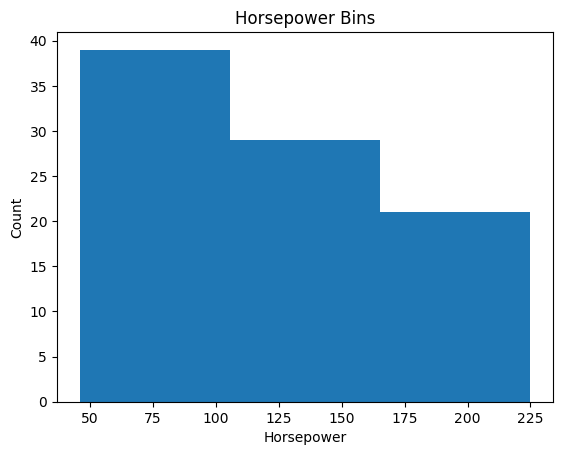

In [48]:
#11. Use a histogram to visualize the distribution of bins we created above.
from matplotlib import pyplot as plt

# Draw histogram of the 'horsepower' column with 3 bins
plt.hist(df["horsepower"], bins=3)

# Set x/y labels and plot title
plt.xlabel("Horsepower")
plt.ylabel("Count")
plt.title("Horsepower Bins")

# Display the plot
plt.show()


12. Detect outliers using Z-score and remove them

In [49]:
from scipy.stats import zscore

# Calculate Z-scores for the 'horsepower' column
df['horsepower_zscore'] = zscore(df['horsepower'])

# Find outliers with Z-score greater than 3 or less than -3
outliers = df[df['horsepower_zscore'].abs() > 3]

# Remove outliers from the dataframe
df_no_outliers = df[df['horsepower_zscore'].abs() <= 3]

# Display outliers
print("Outliers detected based on Z-score:\n", outliers[['car name', 'horsepower', 'horsepower_zscore']])

# Display the first few rows of the dataframe after removing outliers
print("\nData after removing outliers:\n", df_no_outliers.head())


Outliers detected based on Z-score:
 Empty DataFrame
Columns: [car name, horsepower, horsepower_zscore]
Index: []

Data after removing outliers:
      L/100km  cylinders  displacement  horsepower    weight  acceleration  \
0  13.055556          8         307.0         130  0.681712          12.0   
1  15.666667          8         350.0         165  0.718482          11.5   
2  13.055556          8         318.0         150  0.668482          11.0   
3  14.687500          8         304.0         150  0.667899          12.0   
4  13.823529          8         302.0         140  0.671012          10.5   

   model year                   car name CAR Number horsepower_bins  \
0        70.0  chevrolet chevelle malibu    L6V 043          Medium   
1        70.0          buick skylark 320     RTY079            High   
2        70.0         plymouth satellite     MTP600          Medium   
3        70.0              amc rebel sst     MNJ000          Medium   
4        70.0                ford to

In [54]:
outliers = df[df['horsepower_zscore'].abs() > 3]

In [55]:
outliers

,L/100km,cylinders,displacement,horsepower,weight,acceleration,model year,car name,CAR Number,horsepower_bins,horsepower_zscore


In [56]:
df['acceleration_zscore'] = zscore(df['acceleration'])

# Set a threshold to identify outliers (e.g., Z-score > 3 or < -3)
threshold = 3
df_no_outliers = df[df['acceleration_zscore'].abs() <= threshold]

# Display the number of rows before and after removing outliers
print(f"Original dataset size: {df.shape[0]}")
print(f"Dataset size after removing outliers: {df_no_outliers.shape[0]}")

Original dataset size: 89
Dataset size after removing outliers: 88
